In [11]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

print(tf.__version__)

2.0.0-alpha0


#### DL imdb dataset.

###### Going to multi-hot encode to because the model will quickly overfit (for demonstration).

In [12]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_seequences(sequences, dimension):
    #Creating all-zero matrix in the shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 #sets specific indices of results
    return results

train_data = multi_hot_seequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_seequences(test_data, dimension=NUM_WORDS)

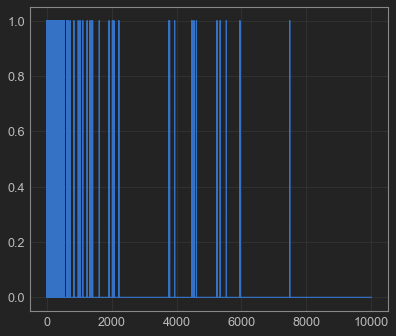

In [13]:
plt.plot(train_data[0])

##### Baseline model:

In [25]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [26]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                      verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 243us/sample - loss: 0.5509 - accuracy: 0.7985 - binary_crossentropy: 0.5509 - val_loss: 0.4049 - val_accuracy: 0.8656 - val_binary_crossentropy: 0.4049
Epoch 2/20
25000/25000 [==============================] - 5s 199us/sample - loss: 0.2964 - accuracy: 0.8983 - binary_crossentropy: 0.2964 - val_loss: 0.2953 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2953
Epoch 3/20
25000/25000 [==============================] - 5s 199us/sample - loss: 0.2098 - accuracy: 0.9279 - binary_crossentropy: 0.2098 - val_loss: 0.3018 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.3018
Epoch 4/20
25000/25000 [==============================] - 5s 200us/sample - loss: 0.1678 - accuracy: 0.9435 - binary_crossentropy: 0.1678 - val_loss: 0.2920 - val_accuracy: 0.8847 - val_binary_crossentropy: 0.2920
Epoch 5/20
25000/25000 [==============================] - 5s 199us/sample - loss: 0.1391 - acc

##### Smaller model:

In [18]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [19]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 220us/sample - loss: 0.6113 - accuracy: 0.7249 - binary_crossentropy: 0.6113 - val_loss: 0.5263 - val_accuracy: 0.8457 - val_binary_crossentropy: 0.5263
Epoch 2/20
25000/25000 [==============================] - 5s 196us/sample - loss: 0.4272 - accuracy: 0.8806 - binary_crossentropy: 0.4272 - val_loss: 0.3842 - val_accuracy: 0.8758 - val_binary_crossentropy: 0.3842
Epoch 3/20
25000/25000 [==============================] - 5s 197us/sample - loss: 0.3048 - accuracy: 0.9092 - binary_crossentropy: 0.3048 - val_loss: 0.3197 - val_accuracy: 0.8842 - val_binary_crossentropy: 0.3197
Epoch 4/20
25000/25000 [==============================] - 5s 196us/sample - loss: 0.2437 - accuracy: 0.9230 - binary_crossentropy: 0.2437 - val_loss: 0.2931 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2931
Epoch 5/20
25000/25000 [==============================] - 5s 198us/sample - loss: 0.2078 - acc

##### And a bigger model:

In [21]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


##### ^ that's alotta params, yo

In [22]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 9s 361us/sample - loss: 0.3512 - accuracy: 0.8446 - binary_crossentropy: 0.3512 - val_loss: 0.2911 - val_accuracy: 0.8795 - val_binary_crossentropy: 0.2911
Epoch 2/20
25000/25000 [==============================] - 9s 346us/sample - loss: 0.1366 - accuracy: 0.9509 - binary_crossentropy: 0.1366 - val_loss: 0.3359 - val_accuracy: 0.8754 - val_binary_crossentropy: 0.3359
Epoch 3/20
25000/25000 [==============================] - 9s 342us/sample - loss: 0.0403 - accuracy: 0.9884 - binary_crossentropy: 0.0403 - val_loss: 0.4445 - val_accuracy: 0.8717 - val_binary_crossentropy: 0.4445
Epoch 4/20
25000/25000 [==============================] - 9s 340us/sample - loss: 0.0063 - accuracy: 0.9991 - binary_crossentropy: 0.0063 - val_loss: 0.6052 - val_accuracy: 0.8679 - val_binary_crossentropy: 0.6052
Epoch 5/20
25000/25000 [==============================] - 8s 338us/sample - loss: 6.8432e-04 -

##### Plotting Training and Val loss:

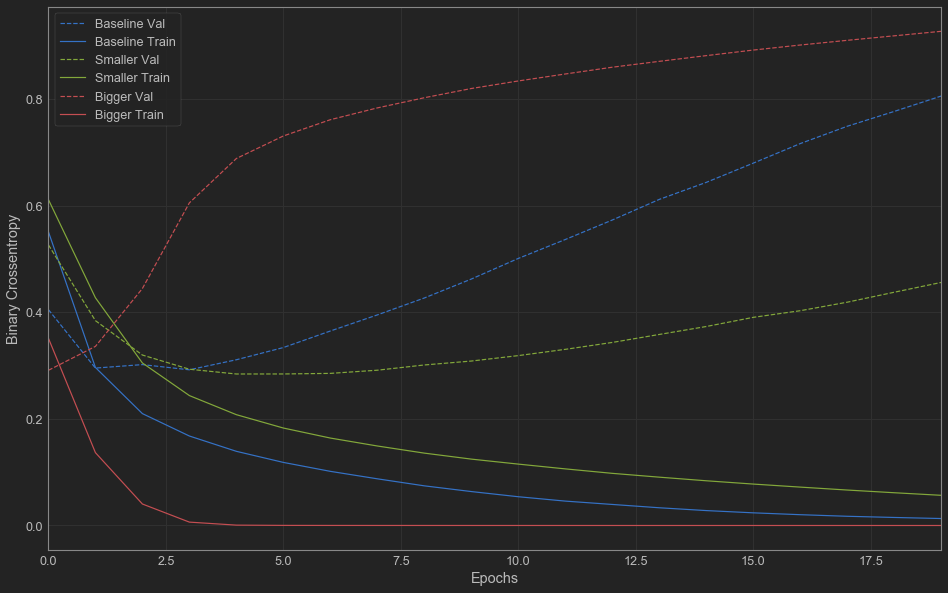

In [27]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

###### Larger NN overfits after 1 epoch.  More capacity = quickly models training data (gives low training loss), but overfits easily (ie: large diff between training and val loss).

##### Prevent overfitting by adding weight regularization.  Simple is best.  The less params, the better.  We can also put constraints on the complexity of the network by forcing the weights to take small values.  "Weight Regularization".  Do this by adding a cost to the loss function.  The cost should be associated with having large weights.

##### L1 regularization:  Cost added proportional to the abs val of weights coefficients (ie: to what is called the "L1 norm" of the weights).

##### L2 regularization:  Cost added proportional to the square of the value of the weights coefficients (id: to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. NOTE:  weight decay is the SAME as L2 regularization.

##### L1 adds sparcity to make weight params close to zero.  L2 penalizes weight parameters without making them sparse.  L2 is more common.

In [31]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 226us/sample - loss: 0.5107 - accuracy: 0.8106 - binary_crossentropy: 0.4682 - val_loss: 0.3662 - val_accuracy: 0.8794 - val_binary_crossentropy: 0.3221
Epoch 2/20
25000/25000 [==============================] - 5s 199us/sample - loss: 0.2918 - accuracy: 0.9129 - binary_crossentropy: 0.2443 - val_loss: 0.3351 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2853
Epoch 3/20
25000/25000 [==============================] - 5s 199us/sample - loss: 0.2427 - accuracy: 0.9338 - binary_crossentropy: 0.1909 - val_loss: 0.3406 - val_accuracy: 0.8855 - val_binary_crossentropy: 0.2873
Epoch 4/20
25000/25000 [==============================] - 5s 201us/sample - loss: 0.2197 - accuracy: 0.9436 - binary_crossentropy: 0.1647 - val_loss: 0.3552 - val_accuracy: 0.8808 - val_binary_crossentropy: 0.2990
Epoch 5/20
25000/25000 [==============================] - 5s 202us/sample - loss: 0.2095 - acc

###### l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

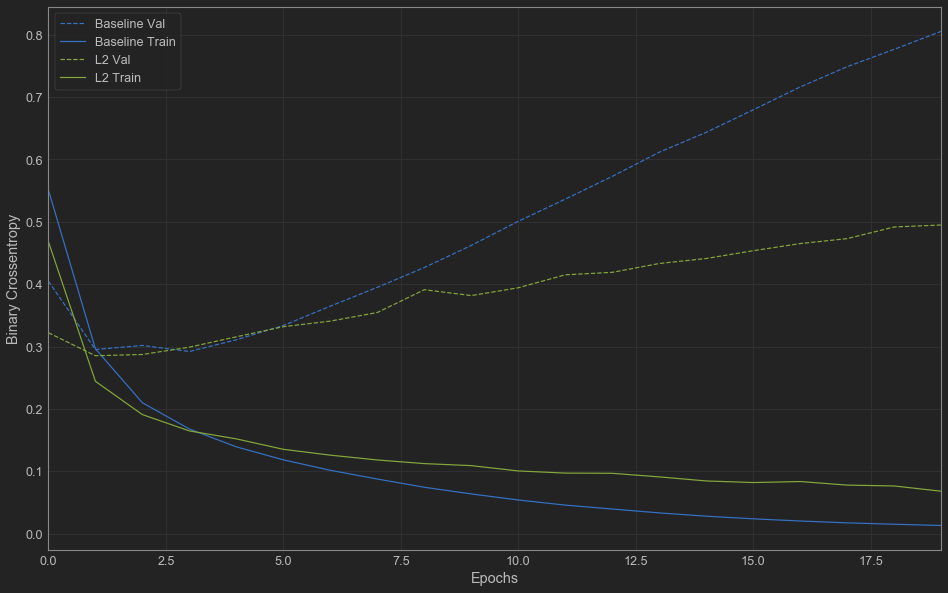

In [32]:
plot_history([('baseline', baseline_history),('l2', l2_model_history)])

###### L2 regularized model is MUCH more resistant to overfitting vs the baseline model.  Both have same # of params.

#### Dropout

###### Dropout sets a random amount of output features of a layer to zero during training.
[0.2, 0.5, 1.3, 0.8, 1.1] --->  [0, 0.5, 1.3, 0, 1.1]
###### "Dropout rate" is the fraction of features being set to Zero.  Rate is normally set between 0.2 and 0.5.  During testing, no units are dropped, but we scale the output values down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

In [33]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 291us/sample - loss: 0.6333 - accuracy: 0.6264 - binary_crossentropy: 0.6333 - val_loss: 0.5080 - val_accuracy: 0.8508 - val_binary_crossentropy: 0.5080
Epoch 2/20
25000/25000 [==============================] - 5s 203us/sample - loss: 0.4903 - accuracy: 0.7715 - binary_crossentropy: 0.4903 - val_loss: 0.3589 - val_accuracy: 0.8768 - val_binary_crossentropy: 0.3589
Epoch 3/20
25000/25000 [==============================] - 5s 200us/sample - loss: 0.3753 - accuracy: 0.8486 - binary_crossentropy: 0.3753 - val_loss: 0.2957 - val_accuracy: 0.8880 - val_binary_crossentropy: 0.2957
Epoch 4/20
25000/25000 [==============================] - 5s 202us/sample - loss: 0.3031 - accuracy: 0.8879 - binary_crossentropy: 0.3031 - val_loss: 0.2753 - val_accuracy: 0.8878 - val_binary_crossentropy: 0.2753
Epoch 5/20
25000/25000 [==============================] - 5s 200us/sample - loss: 0.2534 - acc

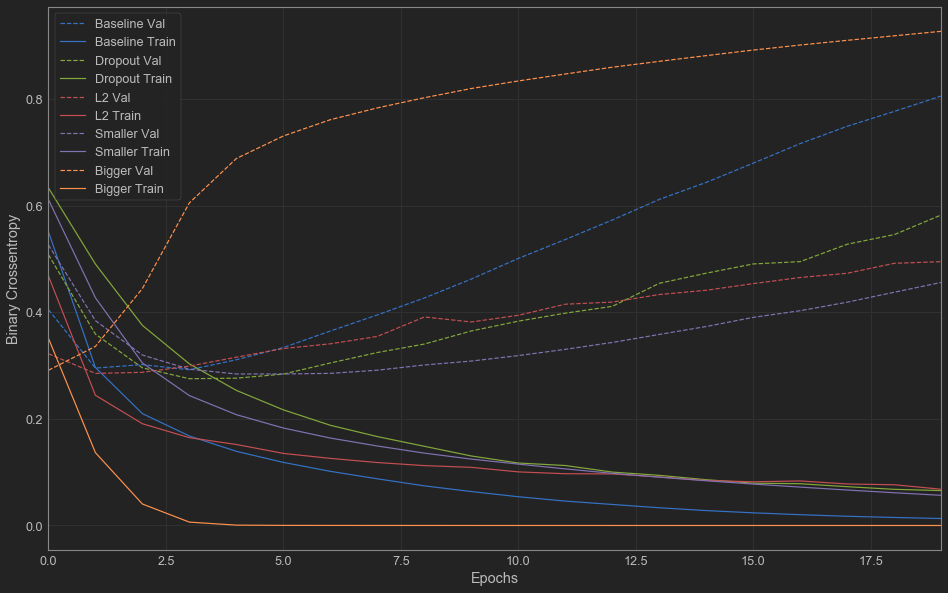

In [36]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history),
             ('l2', l2_model_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

##### Most common ways to prevent overfitting:
##### 1: Get MORE DATA
##### 2: Reduce capacity of NN
##### 3: Add weight regularization
##### 4: Add dropout.
##### Can also use data-augmentaion and batch normalization
##### Ty, next.